In [1]:
import numpy as np
import matplotlib.pyplot as mp
%matplotlib inline

In [7]:
clusters = np.array(['M4, ''NGC3201', 'M5', 'M15', 'M14'])
slopes3p6 = np.array([-2.30, -2.59, -2.24, -2.61, -2.78])
errs3p6 = np.array([0.11, 0.14, 0.31, 0.27, 0.57])
slopes4p5 = np.array([-2.34, -2.58, -2.37, -2.68, -2.00])
errs4p5 = np.array([0.10, 0.15, 0.28, 0.26, 0.55])

cluster_feh = np.array([-1.16, -1.59, -1.29, -2.37, -1.28])

theory_slope3p6 = -2.251
theory_err3p6 = 0.018
theory_slope4p5 = -2.239
theory_err4p5 = 0.018

<Container object of 3 artists>

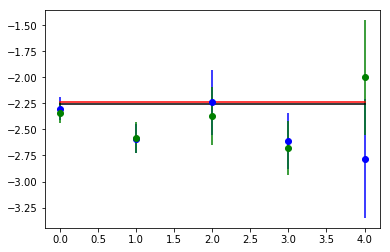

In [29]:
x = np.arange(5)
mp.plot([0, 4], [theory_slope3p6, theory_slope3p6], color='k')
mp.plot([0, 4], [theory_slope4p5, theory_slope4p5], color='r')
mp.errorbar(x, slopes3p6, yerr=errs3p6, fmt='o', color='b')
mp.errorbar(x, slopes4p5, yerr=errs4p5, fmt='o', color='g')


In [12]:
avg_slope3p6 = np.average(slopes3p6, weights=1/errs3p6**2)
avg_slope4p5 = np.average(slopes4p5, weights=1/errs4p5**2)
avg_err3p6 = 1/np.sum(1/errs3p6**2)
avg_err4p5 = 1/np.sum(1/errs4p5**2)
print avg_slope3p6, avg_err3p6
print avg_slope4p5, avg_err4p5

-2.42371369829 0.0062163480035
-2.42531140615 0.00570456412592


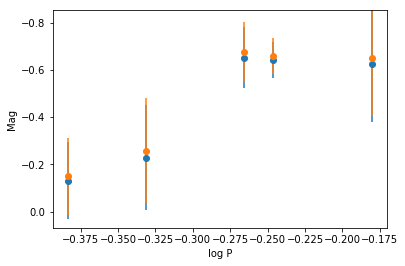

In [19]:
galactic_rrl = np.array(['RZ Cep', 'XZ Cyg', 'UV Oct', 'RR Lyr', 'SU Dra'])
galactic_avgs3p6 = np.array([7.891, 8.676, 8.200, 6.486, 8.616])
galactic_errs3p6 = np.array([0.007, 0.016, 0.014, 0.014, 0.019])
galactic_avgs4p5 = np.array([7.865, 8.645, 8.174, 6.468, 8.588])
galactic_errs4p5 = np.array([0.006, 0.017, 0.014, 0.014, 0.019])
galactic_periods = np.array([0.308645, 0.466579, 0.542600263, 0.566805, 0.660419])
galactic_ebv = np.array([0.252, 0.100, 0.090, 0.042, 0.010])
galactic_a3p6 = 3.1*galactic_ebv*0.060
galactic_a4p5 = 3.1*galactic_ebv*0.051

hst_parallax = np.array([2.54, 1.67, 1.71, 3.77, 1.42])
hst_parallax_err = np.array([0.19, 0.17, 0.10, 0.13, 0.16])
hst_dist = 1/(hst_parallax*1e-3)
hst_mu = 5*np.log10(hst_dist) - 5.
mu_plus = 5*np.log10(1e3 / (hst_parallax + hst_parallax_err)) - 5
mu_minus = 5*np.log10(1e3 / (hst_parallax - hst_parallax_err)) - 5
hst_mu_err = (mu_minus - mu_plus) / 2.



galactic_M3p6 = galactic_avgs3p6 - hst_mu - galactic_a3p6
galactic_M4p5 = galactic_avgs4p5 - hst_mu - galactic_a4p5
galactic_M3p6_err = np.sqrt(hst_mu_err**2+galactic_errs3p6**2)
galactic_M4p5_err = np.sqrt(hst_mu_err**2+galactic_errs4p5**2)

fun_periods = np.log10(galactic_periods)
fun_periods[0] += 0.127
fig = mp.figure()
ax = fig.add_subplot(111)
ax.errorbar(fun_periods, galactic_M3p6, yerr = galactic_M3p6_err, fmt='o')
ax.errorbar(fun_periods, galactic_M4p5, yerr = galactic_M4p5_err, fmt='o')
ax.set_ylim((np.max(galactic_M3p6)+0.2, np.min(galactic_M3p6)-0.2))
ax.set_xlabel('log P')
ax.set_ylabel('Mag')

In [21]:
# calculate ZP
zps_3p6 = galactic_M3p6 + 2.424 * fun_periods
zps_4p5 = galactic_M4p5 + 2.425 * fun_periods

zp_3p6 = np.average(zps_3p6, weights=1/galactic_M3p6_err**2)
zp_3p6_err = 1/np.sum(1/galactic_M3p6_err**2)
zp_4p5 = np.average(zps_4p5, weights=1/galactic_M4p5_err**2)
zp_4p5_err = 1/np.sum(1/galactic_M4p5_err**2)
print zp_3p6, zp_3p6_err
print zp_4p5, zp_4p5_err

-1.20461940011 0.00324988686292
-1.22463153976 0.00324983411527


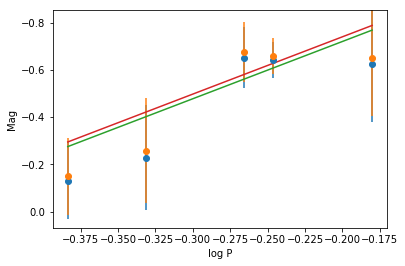

In [22]:
fig = mp.figure()
ax = fig.add_subplot(111)
ax.errorbar(fun_periods, galactic_M3p6, yerr = galactic_M3p6_err, fmt='o')
ax.errorbar(fun_periods, galactic_M4p5, yerr = galactic_M4p5_err, fmt='o')
ax.set_ylim((np.max(galactic_M3p6)+0.2, np.min(galactic_M3p6)-0.2))
ax.set_xlabel('log P')
ax.set_ylabel('Mag')
y_3p6 = -2.424*fun_periods - 1.205
y_4p5 = -2.425*fun_periods - 1.225
ax.plot(fun_periods, y_3p6)
ax.plot(fun_periods, y_4p5)
